# Perceptron

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = (r'C:\Users\USUARIO\Desktop\Personal\Cursos y lectures\Python Machine Learning - Raschka\Datasets\iris.txt')

In [3]:
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# Select setosa and versicolor

y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)

In [7]:
# Extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values

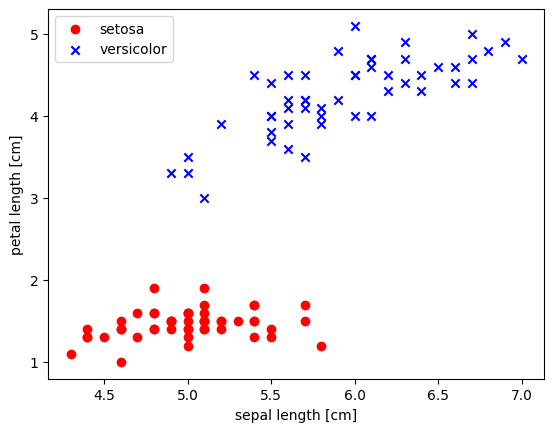

In [8]:
# plot data 
plt.scatter(X[:50,0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Implementemos el Perceptron

In [9]:
import Perceptron as ppn

In [10]:
percep = ppn.Perceptron(eta=0.01, n_iter=10)

In [11]:
percep.fit(X,y)

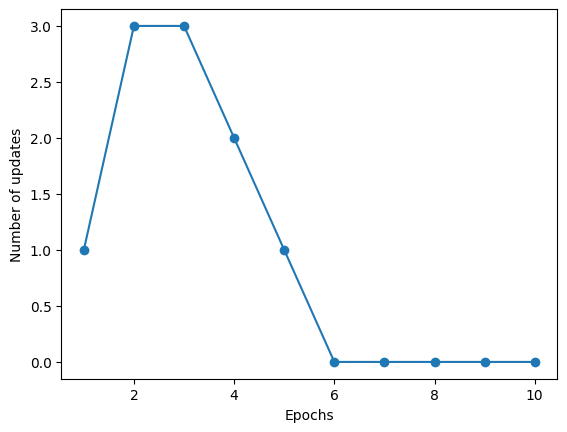

In [12]:
plt.plot(range(1, len(percep.errors_) + 1),
        percep.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Implementación de una función, útil para la visualización de fronteras de decisión para datasets dos-dimensionales

In [13]:
from matplotlib.colors import ListedColormap

In [14]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.03, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl, in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19624\2811391354.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


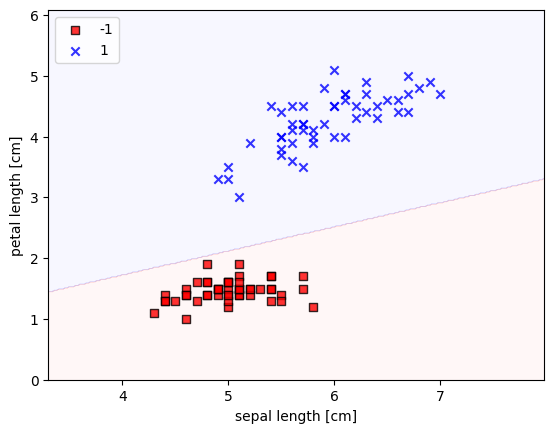

In [15]:
plot_decision_regions(X, y, classifier=percep)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()